In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('Advertising.csv')
# Printing first few records
sales_df.head()

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
y = sales_df['Sales']

In [4]:
X = X.apply(lambda rec: (rec - rec.mean())/rec.std(), axis= 0)
y = np.array((y - y.mean())/y.std())


In [42]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [43]:
import random
#dim - is the number of weights to be initialized besides the bias

def initialize(dim):
    # For reproducible results, the seed it set to 42.
    np.random.seed(seed=42)
    random.seed(42)
    #Initialize the bias.
    b = random.random()
    #Initialize the weights.
    w = np.random.rand(dim)
    return b, w

In [44]:
b, w = initialize(3)
print('Bias: ', b, 'Weights: ', w )

Bias:  0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]


In [45]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix
def predict_y(b, w, X):
    return b + np.dot(X, w)
# y_hat = B0 + B1.X

In [46]:
b, w = initialize(3)
y_hat = predict_y(b, w, X)
y_hat[0:10]

array([ 3.23149557,  1.70784873,  2.82476076,  2.75309026,  0.92448558,
        3.17136498,  0.62234399, -0.34935444, -2.313095  , -0.76802983])

In [53]:
import math
# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost(y,Y_hat):
    # Calculating the residuals - difference between actual and
    # predicted values
     Y_resid= y-Y_hat
    # Matrix multiplication with self will give the square values
    # Then take the sum and divide by number of examples to
    # calculate mean
     return np.sum(np.dot(Y_resid.T, Y_resid) ) / len(Y_resid)

In [54]:
b, w = initialize(3)
y_hat = predict_y(b, w, X)
get_cost(y, y_hat)

1.5303100198505895

In [55]:
def update_beta(X, y, y_hat, b_0, w_0, learning_rate ):
    #gradient of bias
    db = (np.sum(y_hat - y) * 2) / len(y) # partial diff w.r.t B0
    #gradient of weights
    dw = (np.dot((y_hat - y), X) * 2 ) / len(y) # partial diff wrt B1
    #update bias
    b_1 = b_0 - learning_rate * db
    #update beta
    w_1 = w_0 - learning_rate * dw
    #return the new bias and beta values
    return b_1, w_1

In [56]:
b, w = initialize(3)
print('After Initialization - Bias:', b, 'Weights: ', w )
y_hat = predict_y( b, w, X)
b, w = update_beta(X, y, y_hat, b, w, 0.01)
print('After first update - Bias:', b, 'Weights: ', w)

After Initialization - Bias: 0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias: 0.6266382624887261 Weights:  [0.38079093 0.9376953  0.71484883]


In [57]:
def run_gradient_descent(X, y, alpha = 0.01, num_iterations = 100):
    
    # Initialize the bias and weights
    
    b, w = initialize(X.shape[1])
    
    # gd_iterations_df keeps track of the cost every 10 iterations
   
    iter_num = 0
      
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    
    result_idx = 0
    
    # Run the iterations in loop
    
    for each_iter in range(num_iterations):
   
        # Calculate predicted value of y
    
        y_hat = predict_y(b, w, X)
    
        # Calculate the cost
    
        this_cost = get_cost(y, y_hat)
    
        # Save the previous bias and weights
    
        prev_b = b
        prev_w = w
    
        # Update and calculate the new values of bias and weights
    
        b, w = update_beta(X, y, y_hat, prev_b, prev_w, alpha)
    
        # For every 10 iterations, store the cost i.e. MSE
    
        if(iter_num % 10 == 0):
            
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            
            result_idx += 1
        
        iter_num += 1
       
    print('Final estimate of b and w: ', b, w)
    
    #return the final bias, weights and the cost at the end
    return gd_iterations_df, b, w

In [58]:
# learning parameter - 0.01
gd_iterations_df1, b, w =  run_gradient_descent(X, y, alpha = 0.01, num_iterations = 10000)

Final estimate of b and w:  2.775466205076477e-16 [ 0.75306591  0.53648155 -0.00433069]


In [59]:
gd_iterations_df1.iloc[500]

iteration    5000.000000
cost            0.102275
Name: 500, dtype: float64

(0.0, 200.0)

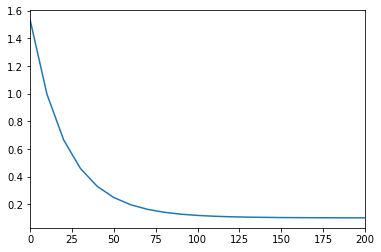

In [60]:
plt.plot(gd_iterations_df1['iteration'], gd_iterations_df1['cost'])
plt.xlim(0,200)

In [61]:
# learning parameter - 0.001
gd_iterations_df2, b, w =  run_gradient_descent(X, y, alpha = 0.001, num_iterations = 10000)

Final estimate of b and w:  1.2918253342422793e-09 [ 0.75306591  0.53648113 -0.00433026]


(0.0, 800.0)

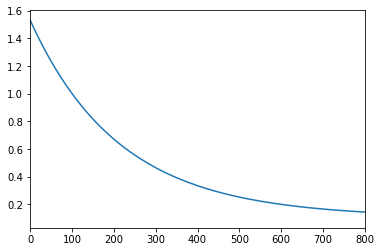

In [62]:
plt.plot(gd_iterations_df2['iteration'], gd_iterations_df2['cost'])
plt.xlim(0,800)

learning is faster for alpha value 0.01 compared to 0.001. 
For smaller values, the learning could be slower whereas higher learning rate 
could lead to skipping the minima of cost function. It is imperative to
search for the optimal learning parameter.